# Stock Price Data Exploration 

### Planning it out
We were deciding between two different methods of grabbing the stock data. 
1. via API calls from [Quandl](https://www.quandl.com/docs/api) (An API that contains stock information LUL)
2. via direct CSV download from NASDAQ 

We decided on the second because it would be simpler and fulfill our purposes for the project.

For initial exploration of data we thought about some of the aspects of the data that we would be interested in seeing. The data gives us a couple of metrics (<--what word do i use here??) to work with:

* Close - The price of the stock at the end of the trading day.
* Open - The price of the stock at the beginning of the trading day.
* Volume - The number of shares that were traded that day
* High - The peak price of the stock for that day
* Low - The lowest price of the stock for that day

What sort of relationships between these metrics did we want to see?

1. We can look at how a given metric can change over different windows/intervals of time. For example, how the closing price changed over the course of the last month versus the change over the last year.

2. Which metrics are more meaningful?

       We're not really sure yet, so we should probably have a function that takes in the metric as a parameter and graphs accordingly.

3. We may want to see how two or more metrics may or may not correlate with one another
    
        Ex: Does volume of trade have a relationship with the closing price of the day?
        
        We may want to be able to plot more than one metric on a single graph to be able to look at these relationships.
    
    
We created functions that would allow us to generate these relationships with greater ease.

* filter_data_by_date
  * Allows us to choose the time interval we want to look at and filters the data to match this interval
  
* plot_stock_data
  * Function that lets us be flexible and plots the metric of our choosing.
  * Currently only plots one graph at a time
  * Allowed the option to graph the linear regression line on top of the data.

### Exploring it out

After importing our CSV and arbitrarily choosing **closing price** to be our metric for exploration --

1. We started graphing out the data points over different intervals of time.

2. We ran some simple linear regressions for each time interval and subsequently graphed those as well.

In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [12]:
aapl_data = pd.read_csv('AAPL.csv', parse_dates = [0], keep_date_col = True)
aapl_data.head(n=5)

,date,close,volume,open,high,low
0,2016-11-04,108.84,30790930.0,108.53,110.25,108.11
1,2016-11-03,109.83,26538700.0,110.98,111.46,109.55
2,2016-11-02,111.59,28174980.0,111.40,112.35,111.23
3,2016-11-01,111.49,43403760.0,113.46,113.77,110.53
4,2016-10-31,113.54,26378910.0,113.65,114.23,113.20


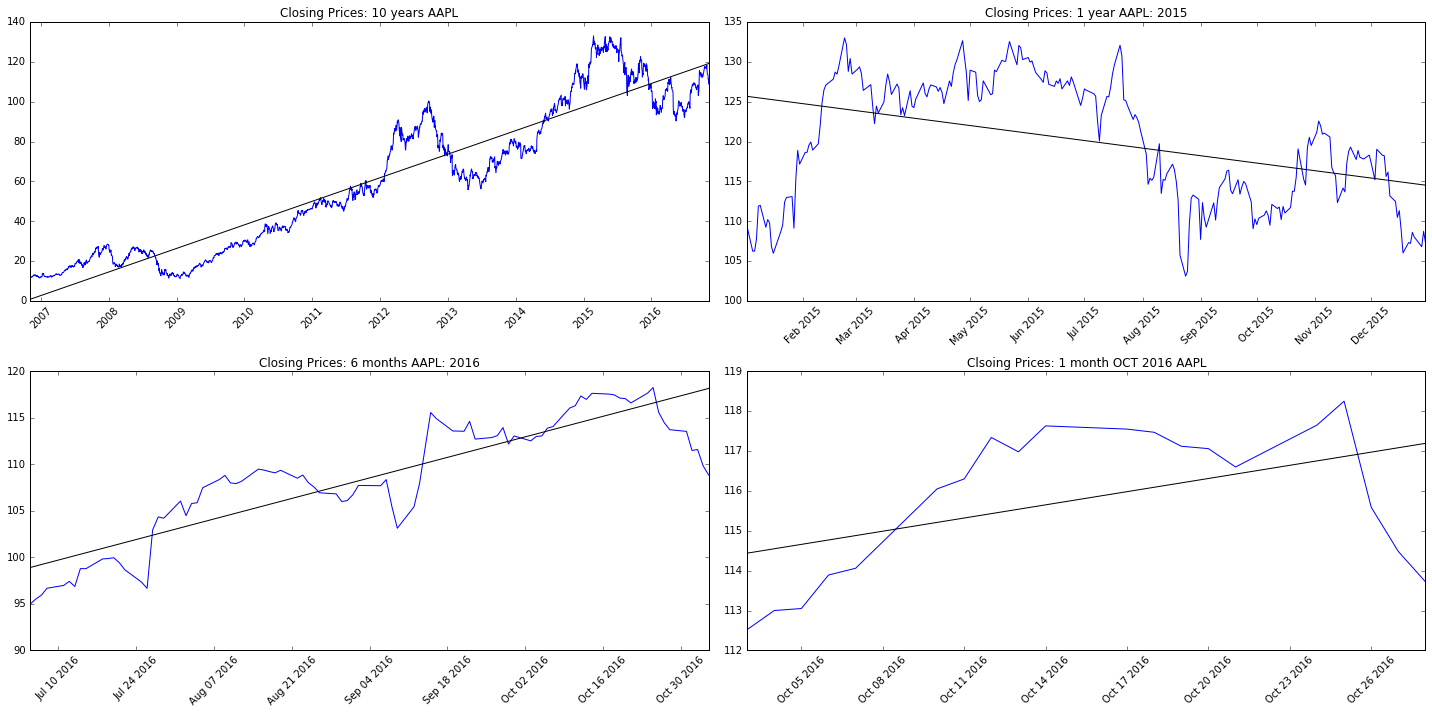

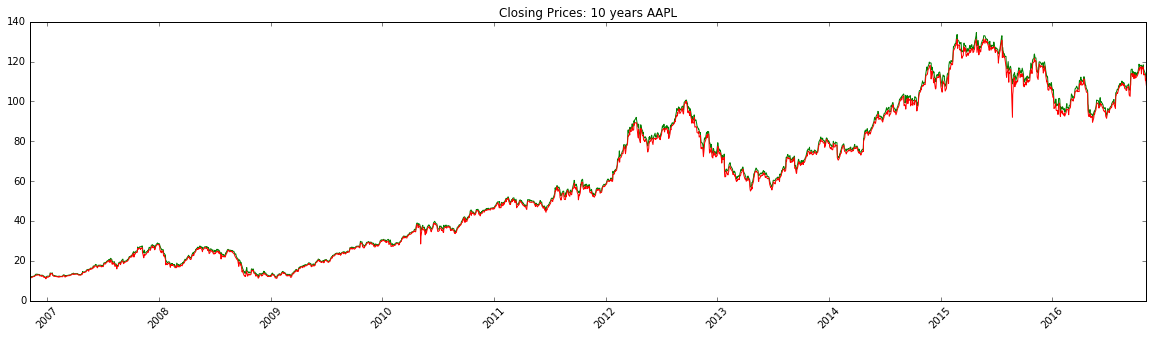

In [98]:
def filter_data_by_date(data, date_start, date_end):
    return data[(data['date'] > date_start) & (data['date'] < date_end)]

def plot_stock_data(data, ax, option="close", title="", lin_reg=False, color='b'):
    ax.set_title(title)
    ax.plot(data['date'].values, data[option].values, c=color)
    
    if(lin_reg):
        lin_reg = linear_model.LinearRegression()
        x_vals = np.arange(len(data['date'].values)).reshape(len(data['date'].values),1)
        lin_reg.fit(x_vals, data[option].values)
        y = lin_reg.predict([[0],[len(data['date'].values)-1]])
        ax.plot([data['date'].values[0], data['date'].values[len(data['date'].values)-1]], y, c='black')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plot_stock_data(aapl_data, ax[0][0], title="Closing Prices: 10 years AAPL", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2015-1-1', '2015-12-31'), ax[0][1], title="Closing Prices: 1 year AAPL: 2015", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-7-1', '2016-12-31'), ax[1][0], title="Closing Prices: 6 months AAPL: 2016", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-10-1', '2016-10-31'), ax[1][1], title="Closing Prices: 1 month OCT 2016 AAPL", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-10-1', '2016-10-31'), ax[1][1], option='high',title="Closing Prices: 1 month OCT 2016 AAPL", lin_reg=True)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
plot_stock_data(aapl_data, ax, option='high' ,title="Closing Prices: 10 years AAPL", color='g')
plot_stock_data(aapl_data, ax, option='low' ,title="Closing Prices: 10 years AAPL", color='r')
plt.show()